In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# set logging to stdout
import logging
import sys

logging.basicConfig(stream=sys.stdout, level=logging.INFO)

In [3]:
from geolifeclef.loaders.GLC23PatchesProviders import (
    MultipleRasterPatchProvider,
    RasterPatchProvider,
    JpegPatchProvider,
)
from geolifeclef.loaders.GLC23Datasets import PatchesDataset

# root path of the data
data_path = "/mnt/data/raw/"
# take all rasters from human footprint detailed (2 rasters here)
p_hfp_d = MultipleRasterPatchProvider(
    data_path + "EnvironmentalRasters/HumanFootprint/detailed/"
)
# take only bio1 and bio2 from bioclimatic rasters (2 rasters from the 3 in the folder)
p_bioclim = MultipleRasterPatchProvider(
    data_path + "EnvironmentalRasters/Climate/BioClimatic_Average_1981-2010/",
    select=["bio1", "bio2"],
)
# take the human footprint 2009 summurized raster (a single raster)
p_hfp_s = RasterPatchProvider(
    data_path + "EnvironmentalRasters/HumanFootprint/summarized/HFP2009_WGS84.tif"
)
# take all sentinel imagery layers (r,g,b,nir = 4 layers)
p_rgb = JpegPatchProvider(
    data_path + "SatellitePatches/",
    # very inefficient normalization in the data loading library
    normalize=False,
)

downloaded_path = "/mnt/data/downloaded/"
dataset = PatchesDataset(
    occurrences=downloaded_path + "PresenceOnlyOccurrences/GLC24-PO-metadata-train.csv",
    providers=(p_hfp_d, p_bioclim, p_hfp_s, p_rgb),
)
len(dataset)

5079797

In [4]:
dataset.provider

Providers:
Rasters in folder:
--------------------------------------------------
n_layers: 1
x_min: -32.27179464817084
y_min: 26.633585651839944
x_resolution: 0.009892734568157884
y_resolution: 0.009892734568157884
n_rows: 4605
n_cols: 6860
--------------------------------------------------
--------------------------------------------------
n_layers: 1
x_min: -32.27179464817084
y_min: 26.633585651839944
x_resolution: 0.009892734568157884
y_resolution: 0.009892734568157884
n_rows: 4605
n_cols: 6860
--------------------------------------------------
--------------------------------------------------
n_layers: 1
x_min: -32.27179464817084
y_min: 26.633585651839944
x_resolution: 0.009892734568157884
y_resolution: 0.009892734568157884
n_rows: 4605
n_cols: 6860
--------------------------------------------------
--------------------------------------------------
n_layers: 1
x_min: -32.27179464817084
y_min: 26.633585651839944
x_resolution: 0.009892734568157884
y_resolution: 0.009892734568157884

In [5]:
res = dataset[0]
res[0].shape

torch.Size([21, 128, 128])

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([21, 128, 128]), label: 248.0
{'lat': 60.05237, 'lon': 15.90922, 'surveyId': 720277.0}


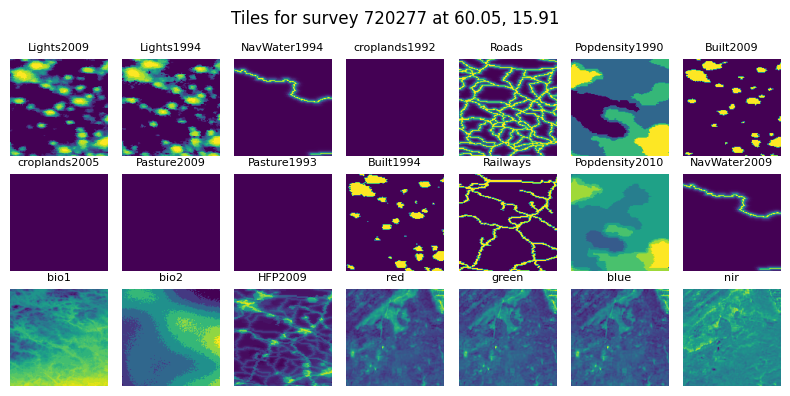

Tensor type: <class 'torch.Tensor'>, tensor shape: torch.Size([21, 128, 128]), label: 6664.0
{'lat': 47.6575, 'lon': -2.755103, 'surveyId': 162363.0}


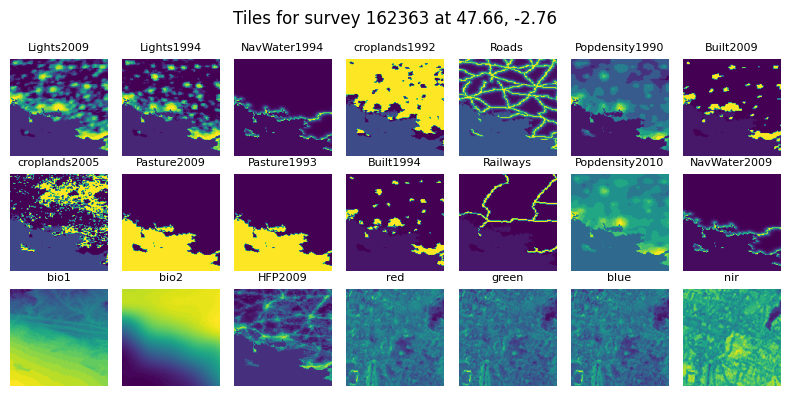

In [11]:
import random
import matplotlib.pyplot as plt

random.seed(42)
ids = [random.randint(0, len(dataset) - 1) for i in range(2)]
for id in ids:
    tensor, label, item = dataset[id]
    print(
        "Tensor type: {}, tensor shape: {}, label: {}".format(
            type(tensor), tensor.shape, label
        )
    )
    print(item)
    dataset.plot_custom(id)
    plt.show()

In [7]:
dataset.provider.bands_names

['Lights2009_WGS84',
 'Lights1994_WGS84',
 'NavWater1994_WGS84',
 'croplands1992_WGS84',
 'Roads_WGS84',
 'Popdensity1990_WGS84',
 'Built2009_WGS84',
 'croplands2005_WGS84',
 'Pasture2009_WGS84',
 'Pasture1993_WGS84',
 'Built1994_WGS84',
 'Railways_WGS84',
 'Popdensity2010_WGS84',
 'NavWater2009_WGS84',
 'bio1',
 'bio2',
 'HFP2009_WGS84',
 'red',
 'green',
 'blue',
 'nir']

In [8]:
tensor

tensor([[[-4.8031e-01, -4.8031e-01, -4.8031e-01,  ...,  1.4273e+00,
           1.4273e+00,  6.6427e-01],
         [-4.8031e-01, -4.8031e-01, -4.8031e-01,  ...,  1.8088e+00,
           1.4273e+00,  6.6427e-01],
         [-4.8031e-01, -4.8031e-01, -4.8031e-01,  ...,  1.4273e+00,
           1.4273e+00,  1.0458e+00],
         ...,
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00]],

        [[-4.2757e-01, -4.2757e-01, -4.2757e-01,  ...,  1.5696e+00,
           1.5696e+00, -2.8133e-02],
         [-4.2757e-01, -4.2757e-01, -4.2757e-01,  ...,  1.9691e+00,
           1.1702e+00,  3.7131e-01],
         [-4.2757e-01, -4.2757e-01, -4.2757e-01,  ...,  7.7074e-01,
           7.7074e-01,  7.7074e-01],
         ...,
         [ 0.0000e+00,  0

In [9]:
import pandas as pd

zipped = list(zip(dataset.provider.bands_names, tensor.cpu().numpy()))
zipped
# single row
row = {k: v.reshape(-1) for k, v in zipped}
df = pd.DataFrame([row])
df

,Lights2009_WGS84,Lights1994_WGS84,NavWater1994_WGS84,croplands1992_WGS84,Roads_WGS84,Popdensity1990_WGS84,Built2009_WGS84,croplands2005_WGS84,Pasture2009_WGS84,Pasture1993_WGS84,...,Railways_WGS84,Popdensity2010_WGS84,NavWater2009_WGS84,bio1,bio2,HFP2009_WGS84,red,green,blue,nir
0,"[-0.48030856, -0.48030856, -0.48030856, -0.480...","[-0.42757124, -0.42757124, -0.42757124, -0.427...","[-0.21278928, -0.21278928, -0.21278928, -0.212...","[1.82242, 1.82242, 1.82242, 1.82242, 1.82242, ...","[-0.55281836, -0.61161697, -0.6459759, -0.6459...","[0.63240314, 0.23062648, 0.23062648, 0.2306264...","[-0.259675, -0.259675, -0.259675, -0.259675, -...","[-0.5192427, -0.5192427, -0.5192427, -0.519242...","[-0.30981892, -0.30981892, -0.30981892, -0.309...","[-0.29144412, -0.29144412, -0.29144412, -0.291...",...,"[-0.25841323, -0.25841323, -0.25841323, -0.258...","[0.22499442, 0.22499442, 0.22499442, 0.2249944...","[-0.21615973, -0.21615973, -0.21615973, -0.216...","[-0.03180766, -0.03180766, -0.04225563, -0.031...","[0.59641486, 0.59641486, 0.59641486, 0.5964148...","[-0.5391478, -0.5556587, -0.56530684, -0.56530...","[81.0, 105.0, 112.0, 113.0, 97.0, 110.0, 125.0...","[87.0, 111.0, 118.0, 119.0, 100.0, 113.0, 128....","[77.0, 101.0, 108.0, 109.0, 93.0, 106.0, 121.0...","[149.0, 153.0, 151.0, 151.0, 137.0, 140.0, 145..."


In [10]:
# let's test the dct and idct
from scipy.fftpack import dct, idct

band = tensor[0].cpu().numpy()